In [1]:
import pandas as pd

df = pd.read_csv('data/ANN_dataset.csv')

df.head()

,Population,Temperature,CPI,Peak
0,63.24917,26.4525,70.233333,14552.5
1,63.20833,26.4850,70.233333,15260.8
2,63.16750,26.5175,70.233333,16485.3
3,63.12667,26.5500,70.233333,16681.1
4,63.08583,26.5825,70.066667,16293.1


In [2]:
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Population,Temperature,CPI,Peak
0,61.32250,26.609167,73.766667,18373.5
1,64.14667,25.916667,92.770000,23442.5
2,66.23333,26.858333,98.250000,26074.6
3,63.23250,26.558333,82.833333,19754.8
4,63.58833,26.852500,85.266667,20505.7


In [3]:
X = df.drop('Peak', axis=1).values
y = df['Peak'].values

X.shape, y.shape

((252, 3), (252,))

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

X[:5]

array([[-2.17209181, -0.48163138, -1.58492893],
       [-0.29477489, -1.76092366,  0.18984903],
       [ 1.09229534, -0.0213326 ,  0.70164257],
       [-0.90245318, -0.57553864, -0.7381659 ],
       [-0.6659215 , -0.03210876, -0.51090964]])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((201, 3), (51, 3), (201,), (51,))

In [7]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(6, activation='relu', input_shape=(3,)))
model.add(keras.layers.Dense(3, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='Adam')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
5/5 [==============================] - 1s 68ms/step - loss: 557525568.0000 - val_loss: 556505984.0000
Epoch 2/50
5/5 [==============================] - 0s 16ms/step - loss: 557524288.0000 - val_loss: 556504768.0000
Epoch 3/50
5/5 [==============================] - 0s 15ms/step - loss: 557523072.0000 - val_loss: 556503616.0000
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 557521792.0000 - val_loss: 556502464.0000
Epoch 5/50
5/5 [==============================] - 0s 15ms/step - loss: 557520576.0000 - val_loss: 556501248.0000
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 557519296.0000 - val_loss: 556500096.0000
Epoch 7/50
5/5 [==============================] - 0s 18ms/step - loss: 557518144.0000 - val_loss: 556498944.0000
Epoch 8/50
5/5 [==============================] - 0s 14ms/step - loss: 557516928.0000 - val_loss: 556497728.0000
Epoch 9/50
5/5 [==============================] - 0s 14ms/step - loss: 557515648.0000 - val_loss

In [8]:
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)

2/2 [==============================] - 0s 2ms/step - loss: 575441600.0000
Test loss: 575441600.0


2/2 [==============================] - 0s 2ms/step


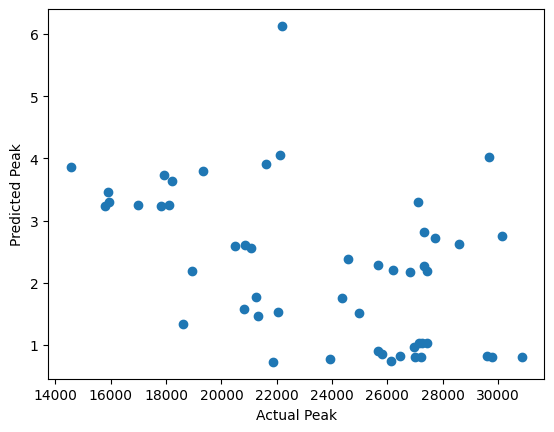

In [9]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Peak')
plt.ylabel('Predicted Peak')
plt.show()